In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import polyval, polyfit, sqrt, stats, randn
from matplotlib.patches import Rectangle

In [2]:
#Konstanten 
c = 3*10**8
e = 1.6*10**-19
ϵ0 = 8.854*10**-12
me = 0.511/(c**2)           #In MeV/c²
mp = 938/(c**2)
ne_al = 6.022*10**28
m_alpha = 3727.379/(c**2)   #In MeV/c²
W_air = 85.7 *10**-6 #in MeV
z_alpha = 2
Ekin_alpha = 5.486  #In MeV

In [3]:
#Gemessen
T_air = 298
ΔT_air = 2
l = 0.08
Δl = 0.001


In [ ]:
#Funktionen

def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def kin_energie(b,m):
    return gamma(b)*m*c**2-m*c**2

def gamma(b):
    return 1/np.sqrt(1-b**2)

def bethe_x(b,ne,z,W):
    #return -4*np.pi*ne*z*z*e**4/(me*c**2*b**2*16*np.pi**2*ϵ0**2)*(-b**2)/(e*10**-9)
    return 4*np.pi*ne*z*z*e**4/(me*c**2*b**2*16*np.pi**2*ϵ0**2)*(np.log(2*me*c**2*b**2/(W*(1-b**2)))-b**2)/(e*10**-9)
    #return -4*np.pi*ne*z*z*e**4/(me*c**2*b**2*16*np.pi**2*ϵ0**2)*(np.log(10*5*gamma(b)**2*b**2))/(e*10**-9)

def bethe_p(b,z,W,T,x):
    return -4*np.pi*3.825*10**26*273*z**2*e**4/(me*c**2*T*b**2*16*np.pi**2*ϵ0**2)*(np.log(2*me*c**2*b**2/(W*(1-b**2)))-b**2)*x/(e*10**-6*10**3*10**-6)
    
    
#p in Bar, T in Kelvin
def elektronDensity_Air(p,T):
    return 3.825*10**26*p*273/T

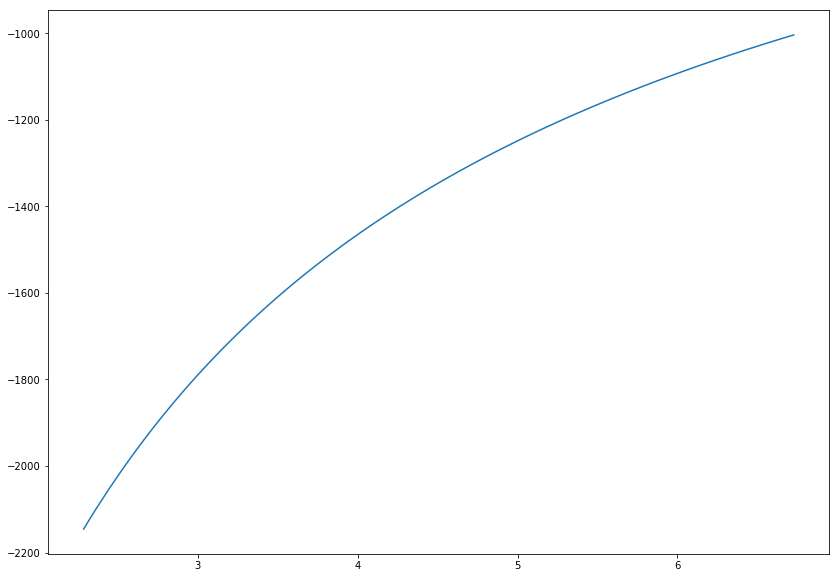

In [191]:
#Bethe Bloch Formel Theorie

ne_normal = elektronDensity_Air(0.2,293)
b = np.linspace(0.035,0.06,100)
E = kin_energie(b,m_alpha)


fig,ax = plt.subplots(figsize=(14,10))
ax.plot(E,bethe_p(b,z_alpha,W_air,T_air,l))


#ax.plot(E,(bethe_x(b,ne_normal,z_alpha,W_air))) #passt 
#ax.loglog(E,(bethe_x(b,ne_normal,z_alpha,W_air)))
#ax.set_xlim([0.2,100])
#(bethe_x(b,ne_normal,z_alpha,W_air))

In [5]:
#Task 1

#Pfad abändern
input = '/home/julian/Studium/Kurse/Semester 6/F-Praktikum/Versuch 14/Task1/calibration.csv'

i=0
channel=[]
value=[]

for line in open(input):
    i=i+1;
    if(i>12):
        d = line.split(";")
        channel.append(float(d[0]))
        value.append(float(d[1]))

#find maximum as start parameter for gauss fit
maxvalue = value.index(max(value))

0.0237464121123


(2500, 3250)

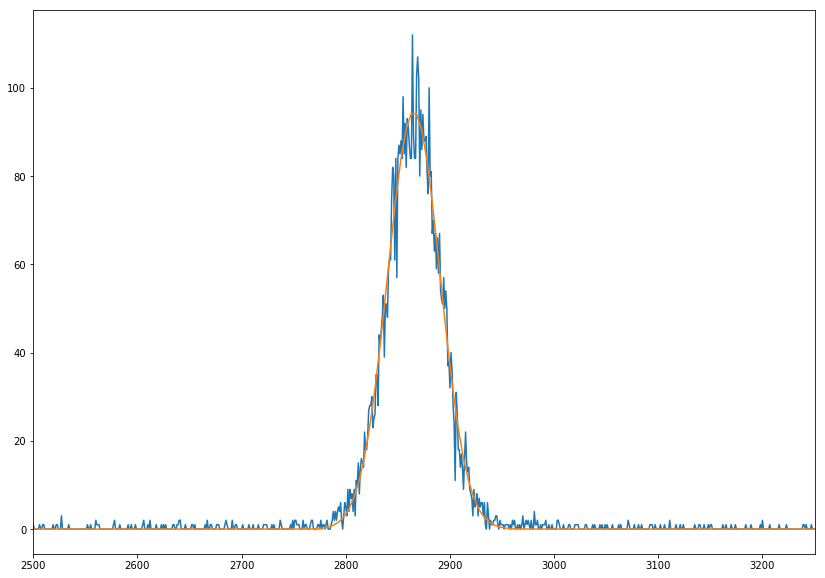

In [29]:
popt, pcov = curve_fit(gauss, channel,value,p0=[1,maxvalue,1])
perr = np.sqrt(np.diag(pcov))

print(perr[1])


x = np.linspace(0,5000,1000)

fig,ax = plt.subplots(figsize=(14,10))
ax.plot(channel,value)
ax.plot(x,gauss(x,*popt))
ax.set_xlim([2500,3250])

In [43]:
#Kalibriere Energieskala
scale_factor = Ekin_alpha/popt[1] #In MeV/channelunit
Δscale_factor =
E_scale = [x*scale_factor for x in channel]

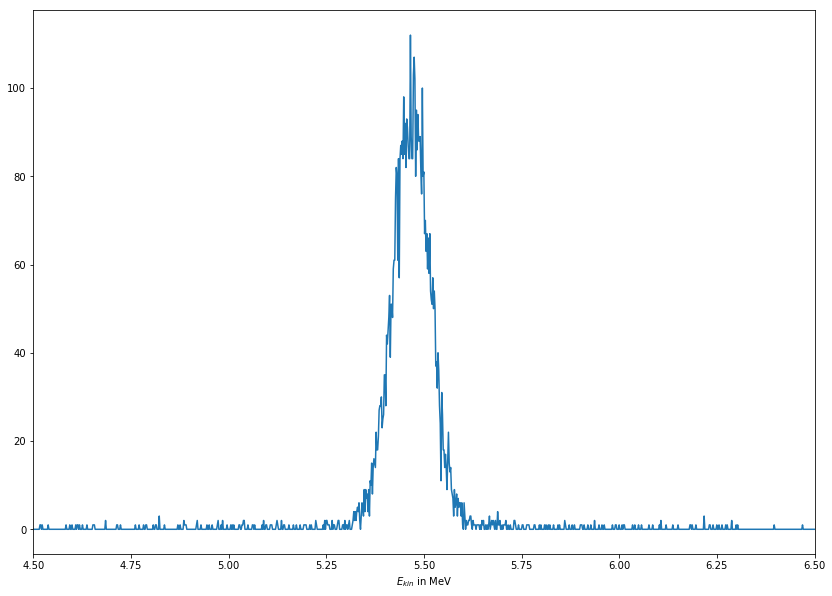

In [47]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(E_scale,value)
ax.set_xlim([4.5,6.5])
ax.set_xlabel(r"$E_{kin}$ in MeV")

In [63]:
#Task 2

path = '/home/julian/Studium/Kurse/Semester 6/F-Praktikum/Versuch 14/Task2/'
data_name = ['p3mbar.csv','p22mbar.csv','p43mbar.csv','p64mbar.csv','p82mbar.csv','p101mbar.csv','p122mbar.csv','p142mbar.csv','p161mbar.csv','p182mbar.csv','p204mbar.csv','p224mbar.csv','p241mbar.csv','p261mbar.csv','p284mbar.csv','p304mbar.csv','p325mbar.csv','p343mbar.csv',]
Pressure = [3,22,43,64,82,101,122,142,161,182,204,224,241,261,284,304,325,343]
E_kin = [] #Has to be filled in the next block
ΔE_kin = []

for name in data_name:
    input = path+name

    i=0
    channel=[]
    value=[]

    for line in open(input):
        i=i+1;
        if(i>12):
            d = line.split(";")
            channel.append(float(d[0]))
            value.append(float(d[1]))

    #find maximum as start parameter for gauss fit
    maxvalue = value.index(max(value))
    
    #Gauss fit
    popt, pcov = curve_fit(gauss, channel,value,p0=[1,maxvalue,1])
    perr = np.sqrt(np.diag(pcov))
    value_mean = [popt[1],perr[1]]
    
    #Umrechnen in Energien
    E_kin1 = value_mean[0]*scale_factor
    #ΔE_kin1 = value_mean
    E_kin.append(E_kin1)

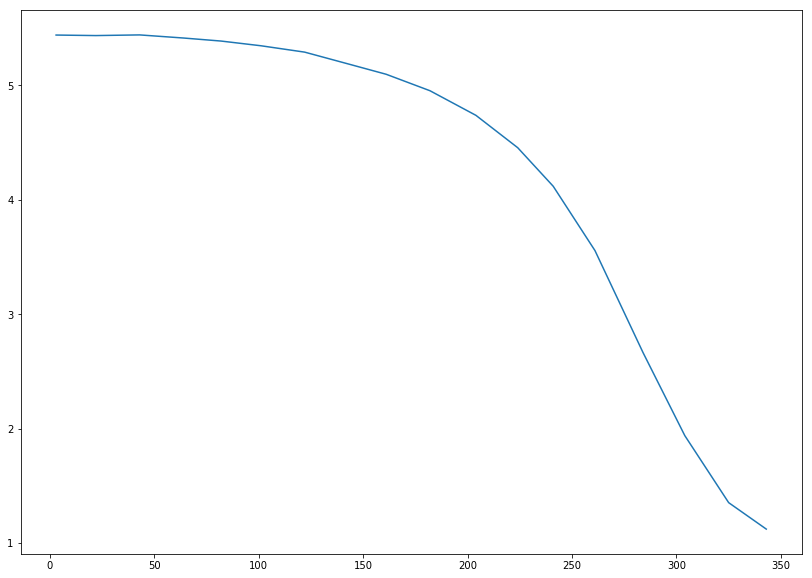

In [65]:
fig,ax = plt.subplots(figsize=(14,10))
ax.plot(Pressure,E_kin)

In [90]:
dE_kin = [sum(x) for x in zip(E_kin[1:],[-y for y in E_kin[:-1]]) ] 
dPressure = [sum(x) for x in zip(Pressure[1:],[-y for y in Pressure[:-1]]) ]

dEdP = []

for i in range(0,len(dE_kin)):
    dEdP.append(dE_kin[i]/dPressure[i])


[-0.00024007910793604438,
 0.00027568381373841008,
 -0.0012944453811100469,
 -0.0014762613669775505,
 -0.0021538589440431798,
 -0.0026580985615830819,
 -0.0049494189938048992,
 -0.0049684140643882985,
 -0.0068621462050531094,
 -0.0097773871966208119,
 -0.014139844168321324,
 -0.019829763993056391,
 -0.028127078366055037,
 -0.038756039551379795,
 -0.036290729351567408,
 -0.027903263136816708,
 -0.012840296237853691]

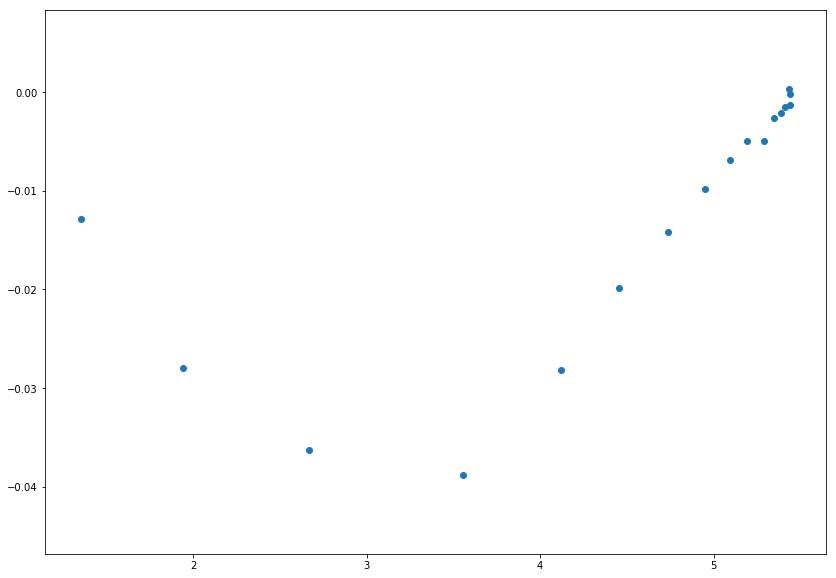

In [194]:
fig,ax = plt.subplots(figsize=(14,10))
ax.scatter(E_kin[:-1],dEdP)

In [209]:
#task 3

#Air

path = '/home/julian/Studium/Kurse/Semester 6/F-Praktikum/Versuch 14/Task3/'
data_name_air = ['Air101mbar.csv','Air142mbar.csv','Air182mbar.csv','Air224mbar.csv','Air261mbar.csv','Air304mbar.csv',]
Pressure_air = [101,142,182,224,261,304]
E_kin_air = []
ΔE_kin_air = []

for name in data_name_air:
    input = path+name

    i=0
    channel=[]
    value=[]

    for line in open(input):
        i=i+1;
        if(i>12):
            d = line.split(";")
            channel.append(float(d[0]))
            value.append(float(d[1]))

    #find maximum as start parameter for gauss fit
    maxvalue = value.index(max(value))
    
    #Gauss fit
    popt, pcov = curve_fit(gauss, channel,value,p0=[1,maxvalue,1])
    perr = np.sqrt(np.diag(pcov))
    value_mean = [popt[1],perr[1]]

    
    #Umrechnen in Energien
    E_kin1 = value_mean[0]*scale_factor
    #ΔE_kin1 = value_mean
    E_kin_air.append(E_kin1)
    
    
    
dE_kin_air = [sum(x) for x in zip(E_kin_air[1:],[-y for y in E_kin_air[:-1]]) ] 
dPressure_air  = [sum(x) for x in zip(Pressure_air[1:],[-y for y in Pressure_air[:-1]]) ]

dEdP_air  = []

for i in range(0,len(dE_kin_air)):
    dEdP_air.append(dE_kin_air[i]/dPressure_air[i])
    
k_air = 14.4
rho_air = 1.1839
A_air = 28.8
ne_air = k_air*rho_air/A_air

print(dE_kin_air[2])
print(E_kin_air[3]-E_kin_air[2])

-0.497899401692
-0.497899401692


In [203]:
#Argon

path = '/home/julian/Studium/Kurse/Semester 6/F-Praktikum/Versuch 14/Task3/'
data_name_ar = ['Ar103mbar.csv','Ar140mbar.csv','Ar182mbar.csv','Ar225mbar.csv','Ar264mbar.csv','Ar305mbar.csv',]
Pressure_ar = [103,140,182,225,264,305]
E_kin_ar = []
ΔE_kin_ar = []

for name in data_name_ar:
    input = path+name

    i=0
    channel=[]
    value=[]

    for line in open(input):
        i=i+1;
        if(i>12):
            d = line.split(";")
            channel.append(float(d[0]))
            value.append(float(d[1]))

    #find maximum as start parameter for gauss fit
    maxvalue = value.index(max(value))
    
    #Gauss fit
    popt, pcov = curve_fit(gauss, channel,value,p0=[1,maxvalue,1])
    perr = np.sqrt(np.diag(pcov))
    value_mean = [popt[1],perr[1]]
    
    
    
    #Umrechnen in Energien
    E_kin1 = value_mean[0]*scale_factor
    #ΔE_kin1 = value_mean
    E_kin_ar.append(E_kin1)
    
    
    
dE_kin_ar = [sum(x) for x in zip(E_kin_ar[1:],[-y for y in E_kin_ar[:-1]]) ] 
dPressure_ar  = [sum(x) for x in zip(Pressure_ar[1:],[-y for y in Pressure_ar[:-1]]) ]

dEdP_ar  = []

for i in range(0,len(dE_kin_ar)):
    dEdP_ar.append(dE_kin_ar[i]/dPressure_ar[i])
    
k_ar = 18
rho_ar = 1.784 
A_ar = 40
ne_ar = k_ar*rho_ar/A_ar


In [204]:
#Helium

path = '/home/julian/Studium/Kurse/Semester 6/F-Praktikum/Versuch 14/Task3/'
data_name_he = ['He100mbar.csv','He144mbar.csv','He180mbar.csv','He225mbar.csv','He262mbar.csv','He301mbar.csv',]
Pressure_he = [100,144,180,225,262,301]
E_kin_he= []
ΔE_kin_he= []

for name in data_name_he:
    input = path+name

    i=0
    channel=[]
    value=[]

    for line in open(input):
        i=i+1;
        if(i>12):
            d = line.split(";")
            channel.append(float(d[0]))
            value.append(float(d[1]))

    #find maximum as start parameter for gauss fit
    maxvalue = value.index(max(value))
    
    #Gauss fit
    popt, pcov = curve_fit(gauss, channel,value,p0=[1,maxvalue,1])
    perr = np.sqrt(np.diag(pcov))
    value_mean = [popt[1],perr[1]]
    
    #Umrechnen in Energien
    E_kin1 = value_mean[0]*scale_factor
    #ΔE_kin1 = value_mean
    E_kin_he.append(E_kin1)
    
    
    
dE_kin_he = [sum(x) for x in zip(E_kin_he[1:],[-y for y in E_kin_he[:-1]]) ] 
dPressure_he  = [sum(x) for x in zip(Pressure_he[1:],[-y for y in Pressure_he[:-1]]) ]



dEdP_he = []

for i in range(0,len(dE_kin_he)):
    dEdP_he.append(dE_kin_he[i]/dPressure_he[i])
    
k_he = 2
rho_he = 0.1785 
A_he = 4
ne_he = k_he*rho_he/A_he

In [205]:
print(dPressure_he)
print(dE_kin_he)
print(dPressure_ar)
print(dE_kin_ar)
print(dPressure_air)
print(dE_kin_air)

[44, 36, 45, 37, 39]
[0.032317246557003187, -0.06796186113692837, -0.0012227652290413005, 0.045900964293802637, -0.017565044937884799]
[37, 42, 43, 39, 41]
[-0.098988400897187745, -0.1833675751179733, -0.35460007917244507, -0.5745842334954494, -1.065588187534833]
[41, 40, 42, 37, 43]
[-0.15480844966934271, -0.23850493752949298, -0.49789940169208435, -0.89964755520305939, -1.6172034967130835]


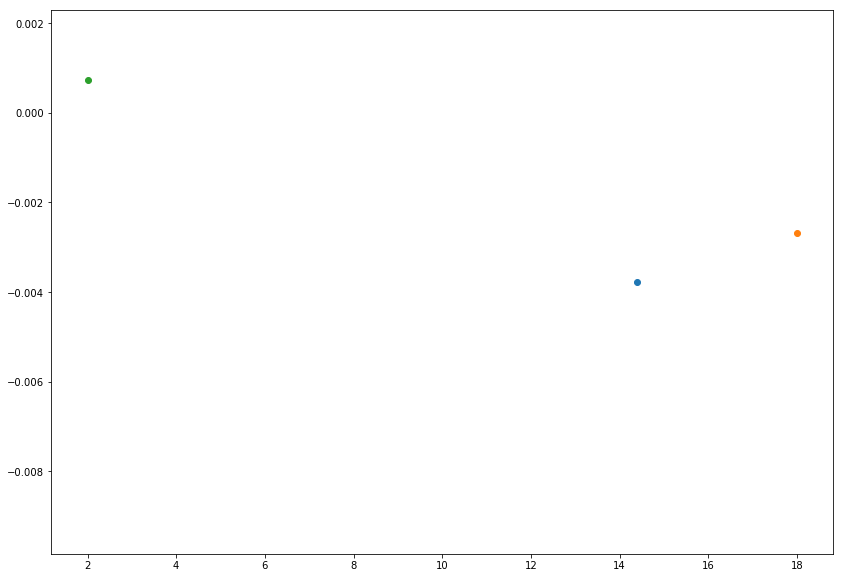

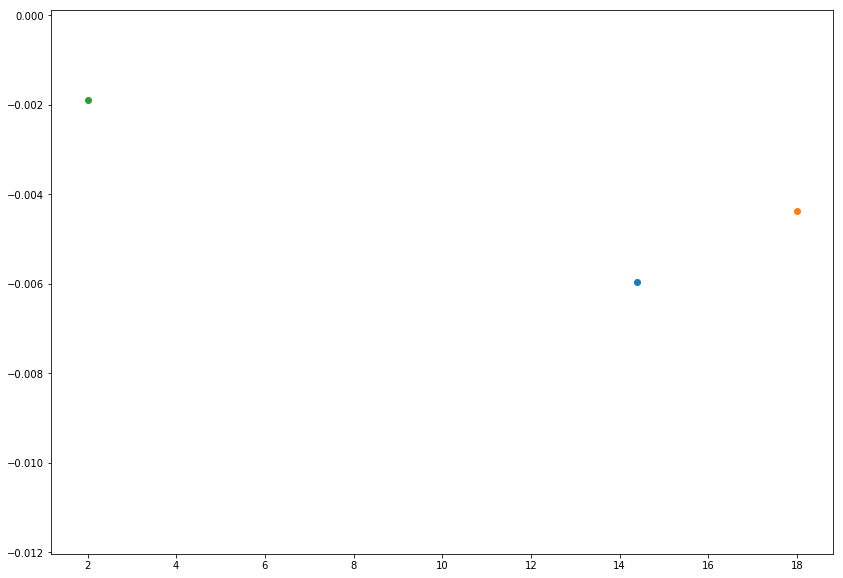

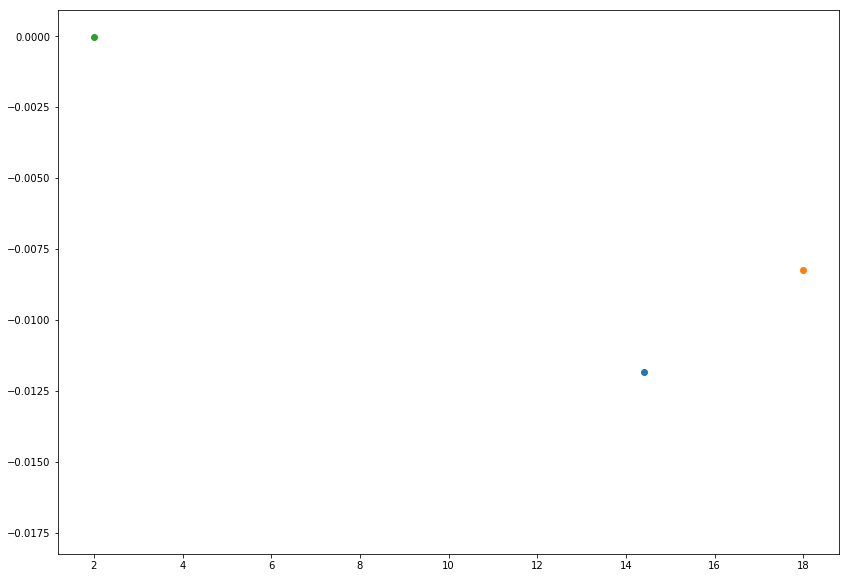

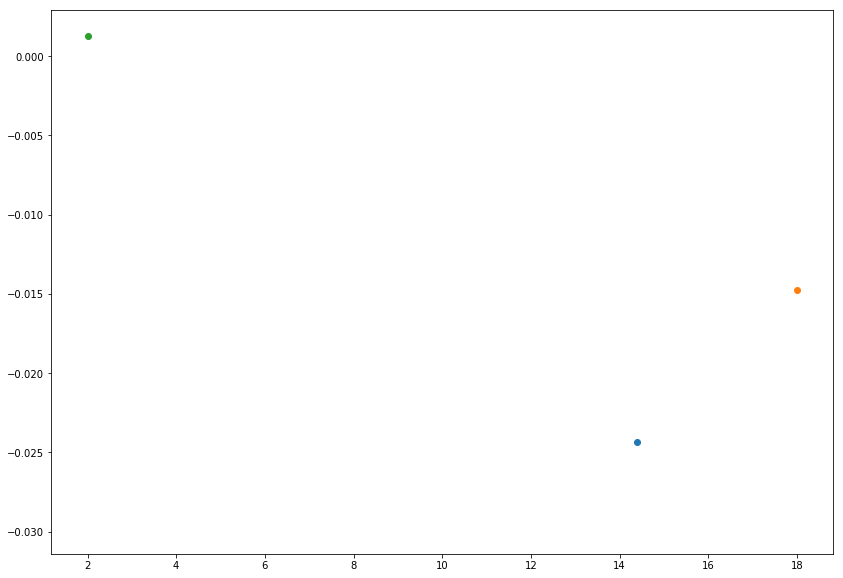

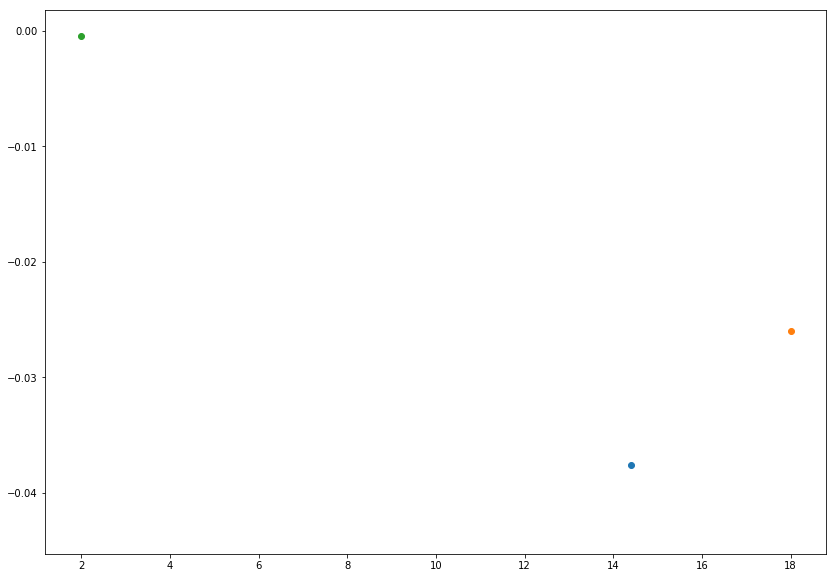

In [150]:


for i in range(0,5):
    fig,ax = plt.subplots(figsize=(14,10))
    ax.scatter(k_air,dEdP_air[i])
    ax.scatter(k_ar,dEdP_ar[i])
    ax.scatter(k_he,dEdP_he[i])